###  RNN  ----（案例一）sin函数  ( n-n )

![这是一个示例图片](rnn.jpg)

In [1]:
# ----------------------导入相关库文件
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# --------------------------
seq_len = 50                    # 序列长度
batch_size = 1                  # 批处理大小
num_time_steps = seq_len       
# ------------------------------
input_size = 1                 # 输入维度
hidden_size = 10               # 隐藏层维度
output_size = 1                # 输出维度
num_layers = 1                 # 隐藏层个数
# ------------------------------

In [3]:
# ---------------------------------定义模型
class rnn2(nn.Module):
    def __init__(self):
        super(rnn2, self).__init__()
        self.rnn = nn.RNN(
            input_size = input_size,
            hidden_size = hidden_size,
            num_layers = num_layers,
            batch_first = True
        )
        self.linear = nn.Linear(hidden_size,output_size)
    def forward(self, x, h_n):
        out, h_n = self.rnn(x, h_n)       # out: [batch, seq_len, hidden_size]
        out = out.view(-1, hidden_size)   # [batch*seq_len, hidden_size]
        out= self.linear(out)             # [batch*seq_len, hidden_size]
        out = out.unsqueeze(dim=0)        # 插入一个维度[1, batch*seq_len, hidden_size]
        return out, h_n                   # h_n向前传播
model = rnn2()

In [8]:
# ------------------------------训练

criterion = nn.MSELoss()         
optimizer = optim.Adam(model.parameters(), lr = 0.01)# 损失函数
loss_list = []
# -------------------------------
def train():
    for epoch in range(100):
        
        # ----------------------------------------------------------------------------
        start = np.random.randint(10, size=1)[0]                      # 序列起点
        time_steps = np.linspace(start, start+10, num_time_steps)     # 序列
        data = np.sin(time_steps).reshape(num_time_steps, 1)          # 序列数据

        x = torch.tensor(data[:-1]).float().view(batch_size, seq_len-1, input_size)
        y = torch.tensor(data[1: ]).float().view(batch_size, seq_len-1, input_size)  
        # 目标为预测一个新的点
        # -------------------------------------------------------------------------------
        h_n = torch.zeros(num_layers, batch_size, hidden_size)        # 初始化h_n
        output, h_n = model(x, h_n)

        loss = criterion(output, y)   # 计算损失
        model.zero_grad()
        loss.backward()
        optimizer.step() 
        loss_list.append(loss.item())
    return h_n,model                                                # 返回模型和h_n用于测试

h_n,model1 = train()
    

In [9]:
print(loss_list)

[0.3450262248516083, 0.2689110338687897, 0.23014889657497406, 0.21815089881420135, 0.17526933550834656, 0.17760270833969116, 0.1514214724302292, 0.12300004810094833, 0.09376854449510574, 0.08130230009555817, 0.07123744487762451, 0.05980426445603371, 0.04988599941134453, 0.03759617358446121, 0.031055161729454994, 0.02633833885192871, 0.02299780584871769, 0.022906525060534477, 0.018138758838176727, 0.014322774484753609, 0.020625311881303787, 0.020370474085211754, 0.024428989738225937, 0.01692958176136017, 0.007864043116569519, 0.017870599403977394, 0.00978892669081688, 0.009318388067185879, 0.005100495181977749, 0.006363894324749708, 0.01954079605638981, 0.008058753795921803, 0.00469569955021143, 0.012333881109952927, 0.005890419241040945, 0.005600546021014452, 0.01754554733633995, 0.007741895038634539, 0.004769272170960903, 0.013079133816063404, 0.008946897462010384, 0.011857766658067703, 0.01227924320846796, 0.0064288657158613205, 0.008025732822716236, 0.00611014012247324, 0.0104685872

Text(0.5, 1.0, 'RNN LOSS')

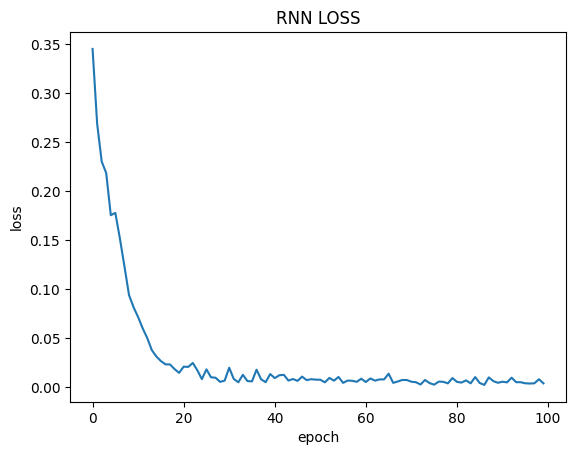

In [10]:
# -------------------------------画图
plt.plot(loss_list)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('RNN LOSS')

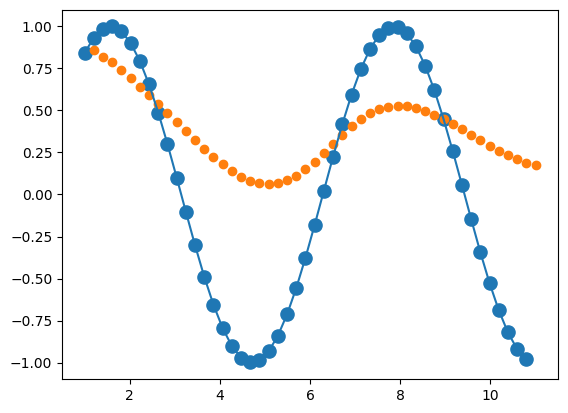

In [11]:
# -----------------------------------------------------------------------------
start = np.random.randint(3, size=1)[0]                               # 序列起点
time_steps = np.linspace(start, start+10, num_time_steps)             # 序列
data = np.sin(time_steps).reshape(num_time_steps, 1)                  # 序列数据
x = torch.tensor(data[:-1]).float().view(batch_size, seq_len-1, input_size)
y = torch.tensor(data[1: ]).float().view(batch_size, seq_len-1, input_size)  
# 目标为预测一个新的点    
# ------------------------------------------------------------------------------
predictions = []                                                      # 预测结果
input = x[:,0,:]
for _ in range(x.shape[1]):
    input = input.view(1, 1, 1)
    pred, h_n = model(input, h_n)
    input = pred                                                      # 循环获得每个input点输入网络
    predictions.append(pred.detach().numpy()[0])
x= x.data.numpy()
y = y.data.numpy( )
plt.scatter(time_steps[:-1], x.squeeze(), s=90)
plt.plot(time_steps[:-1], x.squeeze())
plt.scatter(time_steps[1:],predictions)                              # 黄色为预测
plt.show()
